# 

In [18]:
import random
import pandas as pd
import numpy as np
from typing import List

In [30]:
def get_abc_blocks(n:int, optional_chars:List[str]= "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789+-/* ", cube_size=6) -> List[List[str]]:
    return [random.sample(optional_chars, k=cube_size) for _ in range(n)]

## Create data

In [67]:
n = 100

# Generate data
abc_blocks = get_abc_blocks(n)

# Make a DataFrame with the blocks
df_abc_blocs = pd.DataFrame(abc_blocks, columns=["A", "B", "C", "D", "E", "F"])

# Create "identifiable" index
df_abc_blocs.index = df_abc_blocs.apply(lambda x: "".join(sorted(x)), axis=1)

abc_blocks_matrix = df_abc_blocs.values

### Dataset

In [23]:

abc_blocks = np.array([
    [' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' '],
    ['+', 'A', 'H', 'L', 'M', 'P'],
    ['-', 'D', 'I', 'K', 'N', 'X'],
    ['1', 'A', 'B', 'O', 'R', 'S'],
    ['1', 'A', 'E', 'L', 'N', 'R'],
    ['2', 'B', 'E', 'K', 'P', 'Y'],
    ['2', 'B', 'I', 'M', 'P', 'S'],
    ['3', 'A', 'H', 'N', 'O', 'T'],
    ['3', 'C', 'F', 'Q', 'U', 'Å'],
    ['4', 'A', 'F', 'H', 'I', 'T'],
    ['4', 'D', 'F', 'M', 'O', 'R'],
    ['5', 'A', 'E', 'G', 'P', 'S'],
    ['5', 'D', 'E', 'G', 'N', 'S'],
    ['6', 'B', 'I', 'O', 'Q', 'T'],
    ['6', 'C', 'E', 'H', 'L', 'T'],
    ['6', 'E', 'F', 'G', 'I', 'T'],
    ['6', 'I', 'K', 'M', 'N', 'U'],
    ['7', 'A', 'C', 'L', 'R', 'U'],
    ['7', 'G', 'H', 'I', 'L', 'U'],
    ['8', 'D', 'M', 'O', 'S', 'Y'],
    ['=', 'G', 'K', 'T', 'U', 'V'],
    ['A', 'B', 'I', 'N', 'R', 'Å'],
    ['A', 'B', 'I', 'N', 'R', 'Æ'],
    ['A', 'I', 'K', 'N', 'P', 'Å'],
    ['A', 'K', 'L', 'M', 'R', 'Y'],
    ['D', 'E', 'O', 'S', 'V', 'Ø'],
    ['E', 'H', 'J', 'M', 'Y', '_'],
    ['E', 'K', 'L', 'N', 'N', 'T'],
    ['F', 'J', 'M', 'O', 'S', 'U'],
    ['I', 'J', 'M', 'P', 'S', 'Å'],
    ['J', 'L', 'O', 'P', 'X', 'Y'],
])

(34, 6)

## PyGAD

[Docs](https://pygad.readthedocs.io/en/latest/)

In [65]:
phrase = "GOD FREDAG"
solution_phrase = list(phrase)
print(len(phrase))

10


In [66]:
def fitness_func(ga_instance, solution, solution_idx):
    row_indices = np.arange(abc_blocks.shape[0])
    one_solution = abc_blocks[row_indices, solution]

    final_solution = []
    solution_phrase_tmp = solution_phrase.copy()
    for char in one_solution:  # Iterate in reverse
        # print(char, solution_phrase_tmp)
        if char in solution_phrase_tmp:
            # print("Popping char", char)
            i = solution_phrase_tmp.index(char)
            solution_char = solution_phrase_tmp.pop(i)
            final_solution.append(solution_char)
        elif not solution_phrase_tmp:
            break

    return len(final_solution)

## Genetic algorithm
[Doc: pygad.GA()](https://pygad.readthedocs.io/en/latest/pygad.html) 

In [67]:
import pygad
ga_instance = pygad.GA(
    num_generations=200,
    sol_per_pop=10,
    num_parents_mating=10,
    crossover_probability=0.8,
    mutation_probability=0.2,
    fitness_func=fitness_func,
    num_genes=abc_blocks.shape[0],
    gene_type=int,
    init_range_low=0,
    init_range_high=5,
    stop_criteria=[f"reach_{len(solution_phrase)}"],
)

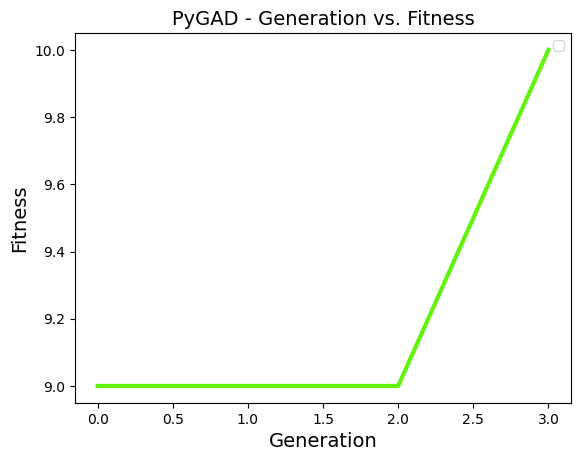

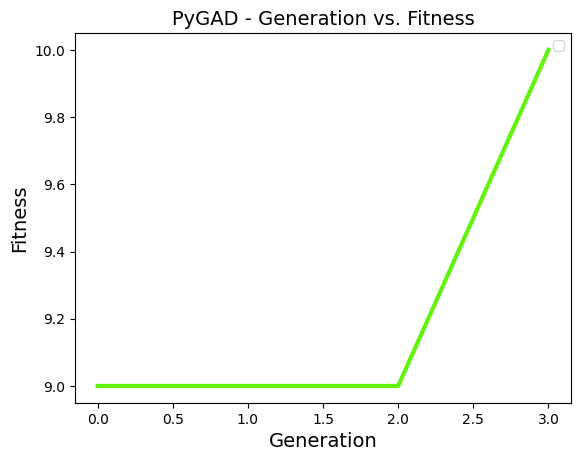

In [68]:
ga_instance.run()

ga_instance.plot_fitness()

In [86]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()

In [87]:
solution

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 0, 4, 0, 1, 1, 3, 1, 3, 4, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 4, 4, 0, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 2, 4, 0, 1,
       4, 2, 2, 3, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 4, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 4, 0, 2, 0, 1, 2, 2, 1])